# EDA

In [3]:
from pyspark.sql import SparkSession

In [4]:
# Create Spark Session
spark = SparkSession.builder \
                    .appName('CTR')\
                    .getOrCreate()

23/08/05 22:27:13 WARN Utils: Your hostname, ptn-PC resolves to a loopback address: 127.0.1.1; using 192.168.1.100 instead (on interface wlx30de4b211ef8)
23/08/05 22:27:13 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/08/05 22:27:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Load Data

In [5]:
#Upload the dataset in your s3 bucket.
#Moidfy this command according to your s3 bucket.
df = spark.read.csv('./ctr_traindata2.csv', header=True, inferSchema=True)

In [6]:
df

DataFrame[id: decimal(20,0), click: int, hour: int, C1: int, banner_pos: int, site_id: string, site_domain: string, site_category: string, app_id: string, app_domain: string, app_category: string, device_id: string, device_ip: string, device_model: string, device_type: int, device_conn_type: int, C14: int, C15: int, C16: int, C17: int, C18: int, C19: int, C20: int, C21: int]

In [7]:
df.show(10)

+--------------------+-----+--------+----+----------+--------+-----------+-------------+--------+----------+------------+---------+---------+------------+-----------+----------------+-----+---+---+----+---+---+------+---+
|                  id|click|    hour|  C1|banner_pos| site_id|site_domain|site_category|  app_id|app_domain|app_category|device_id|device_ip|device_model|device_type|device_conn_type|  C14|C15|C16| C17|C18|C19|   C20|C21|
+--------------------+-----+--------+----+----------+--------+-----------+-------------+--------+----------+------------+---------+---------+------------+-----------+----------------+-----+---+---+----+---+---+------+---+
| 1000009418151094273|    0|14102100|1005|         0|1fbe01fe|   f3845767|     28905ebd|ecad2386|  7801e8d9|    07d7df22| a99f214a| ddd2926e|    44956a24|          1|               2|15706|320| 50|1722|  0| 35|    -1| 79|
|10000169349117863715|    0|14102100|1005|         0|1fbe01fe|   f3845767|     28905ebd|ecad2386|  7801e8d9|    

In [8]:
df.printSchema()

root
 |-- id: decimal(20,0) (nullable = true)
 |-- click: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- C1: integer (nullable = true)
 |-- banner_pos: integer (nullable = true)
 |-- site_id: string (nullable = true)
 |-- site_domain: string (nullable = true)
 |-- site_category: string (nullable = true)
 |-- app_id: string (nullable = true)
 |-- app_domain: string (nullable = true)
 |-- app_category: string (nullable = true)
 |-- device_id: string (nullable = true)
 |-- device_ip: string (nullable = true)
 |-- device_model: string (nullable = true)
 |-- device_type: integer (nullable = true)
 |-- device_conn_type: integer (nullable = true)
 |-- C14: integer (nullable = true)
 |-- C15: integer (nullable = true)
 |-- C16: integer (nullable = true)
 |-- C17: integer (nullable = true)
 |-- C18: integer (nullable = true)
 |-- C19: integer (nullable = true)
 |-- C20: integer (nullable = true)
 |-- C21: integer (nullable = true)



In [9]:
df.columns

['id',
 'click',
 'hour',
 'C1',
 'banner_pos',
 'site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_id',
 'device_ip',
 'device_model',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21']

In [10]:
df.head(5)

[Row(id=Decimal('1000009418151094273'), click=0, hour=14102100, C1=1005, banner_pos=0, site_id='1fbe01fe', site_domain='f3845767', site_category='28905ebd', app_id='ecad2386', app_domain='7801e8d9', app_category='07d7df22', device_id='a99f214a', device_ip='ddd2926e', device_model='44956a24', device_type=1, device_conn_type=2, C14=15706, C15=320, C16=50, C17=1722, C18=0, C19=35, C20=-1, C21=79),
 Row(id=Decimal('10000169349117863715'), click=0, hour=14102100, C1=1005, banner_pos=0, site_id='1fbe01fe', site_domain='f3845767', site_category='28905ebd', app_id='ecad2386', app_domain='7801e8d9', app_category='07d7df22', device_id='a99f214a', device_ip='96809ac8', device_model='711ee120', device_type=1, device_conn_type=0, C14=15704, C15=320, C16=50, C17=1722, C18=0, C19=35, C20=100084, C21=79),
 Row(id=Decimal('10000371904215119486'), click=0, hour=14102100, C1=1005, banner_pos=0, site_id='1fbe01fe', site_domain='f3845767', site_category='28905ebd', app_id='ecad2386', app_domain='7801e8d9',

### Removing Columns which are String & not required

In [11]:
df_selected = df.select(['click', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'])

In [12]:
df_selected.head()

Row(click=0, C1=1005, banner_pos=0, device_type=1, device_conn_type=2, C14=15706, C15=320, C16=50, C17=1722, C18=0, C19=35, C20=-1, C21=79)

In [13]:
df_selected.show(10)

+-----+----+----------+-----------+----------------+-----+---+---+----+---+---+------+---+
|click|  C1|banner_pos|device_type|device_conn_type|  C14|C15|C16| C17|C18|C19|   C20|C21|
+-----+----+----------+-----------+----------------+-----+---+---+----+---+---+------+---+
|    0|1005|         0|          1|               2|15706|320| 50|1722|  0| 35|    -1| 79|
|    0|1005|         0|          1|               0|15704|320| 50|1722|  0| 35|100084| 79|
|    0|1005|         0|          1|               0|15704|320| 50|1722|  0| 35|100084| 79|
|    0|1005|         0|          1|               0|15706|320| 50|1722|  0| 35|100084| 79|
|    0|1005|         1|          1|               0|18993|320| 50|2161|  0| 35|    -1|157|
|    0|1005|         0|          1|               0|16920|320| 50|1899|  0|431|100077|117|
|    0|1005|         0|          1|               0|20362|320| 50|2333|  0| 39|    -1|157|
|    0|1005|         1|          1|               0|20632|320| 50|2374|  3| 39|    -1| 23|

In [14]:
df_selected.select("click").distinct().show()

+-----+
|click|
+-----+
|    1|
|    0|
+-----+



In [15]:
df_selected.select("C14").distinct().show()

+-----+
|  C14|
+-----+
|17753|
|20382|
|21700|
|20135|
|  463|
| 6397|
|20596|
| 6393|
|19878|
|12471|
| 6559|
| 1270|
|21633|
|20170|
|21296|
| 6361|
|21412|
|21675|
|21484|
| 6557|
+-----+
only showing top 20 rows



In [16]:
df_selected.groupby('click').count().show()

+-----+-----+
|click|count|
+-----+-----+
|    1|17490|
|    0|82509|
+-----+-----+



In [17]:
from pyspark.sql.functions import col, countDistinct

In [18]:
df_selected.agg(countDistinct("click")).show()

+------------+
|count(click)|
+------------+
|           2|
+------------+



In [19]:
df_selected.agg(countDistinct("C14")).show()

+----------+
|count(C14)|
+----------+
|       420|
+----------+



In [20]:
df_selected.columns

['click',
 'C1',
 'banner_pos',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21']

In [21]:
for c in df_selected.columns:
    print(c)
    

click
C1
banner_pos
device_type
device_conn_type
C14
C15
C16
C17
C18
C19
C20
C21


### Get Distinct Count of Categorical Features

In [22]:
df_selected.agg(*(countDistinct(col(c)).alias(c) for c in df_selected.columns)).show()

+-----+---+----------+-----------+----------------+---+---+---+---+---+---+---+---+
|click| C1|banner_pos|device_type|device_conn_type|C14|C15|C16|C17|C18|C19|C20|C21|
+-----+---+----------+-----------+----------------+---+---+---+---+---+---+---+---+
|    2|  6|         5|          4|               4|420|  5|  6|128|  4| 37|137| 29|
+-----+---+----------+-----------+----------------+---+---+---+---+---+---+---+---+



### Avoid features which are having huge distinct count, Since that many columns will be created while One Hot Encoding

In [23]:
df_filtered = df_selected.select(['click', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18'])

In [24]:
df_filtered.show(10)

+-----+----+----------+-----------+----------------+---+---+---+
|click|  C1|banner_pos|device_type|device_conn_type|C15|C16|C18|
+-----+----+----------+-----------+----------------+---+---+---+
|    0|1005|         0|          1|               2|320| 50|  0|
|    0|1005|         0|          1|               0|320| 50|  0|
|    0|1005|         0|          1|               0|320| 50|  0|
|    0|1005|         0|          1|               0|320| 50|  0|
|    0|1005|         1|          1|               0|320| 50|  0|
|    0|1005|         0|          1|               0|320| 50|  0|
|    0|1005|         0|          1|               0|320| 50|  0|
|    0|1005|         1|          1|               0|320| 50|  3|
|    1|1005|         0|          1|               2|320| 50|  0|
|    0|1002|         0|          0|               0|320| 50|  3|
+-----+----+----------+-----------+----------------+---+---+---+
only showing top 10 rows



In [25]:
df_filtered.agg(*(countDistinct(col(c)).alias(c) for c in df_filtered.columns)).show()

+-----+---+----------+-----------+----------------+---+---+---+
|click| C1|banner_pos|device_type|device_conn_type|C15|C16|C18|
+-----+---+----------+-----------+----------------+---+---+---+
|    2|  6|         5|          4|               4|  5|  6|  4|
+-----+---+----------+-----------+----------------+---+---+---+



In [26]:
df_filtered.printSchema()

root
 |-- click: integer (nullable = true)
 |-- C1: integer (nullable = true)
 |-- banner_pos: integer (nullable = true)
 |-- device_type: integer (nullable = true)
 |-- device_conn_type: integer (nullable = true)
 |-- C15: integer (nullable = true)
 |-- C16: integer (nullable = true)
 |-- C18: integer (nullable = true)



In [27]:
df_filtered.columns

['click',
 'C1',
 'banner_pos',
 'device_type',
 'device_conn_type',
 'C15',
 'C16',
 'C18']

# Data Preparation

### No String, All Integer columns, So String Indexer not required, we can directly go for one-hot encoding

### One hot encoding

In [32]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder

In [33]:
OHE = OneHotEncoder(inputCols=['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18'],
                    outputCols=['C1_encoded', 'banner_pos_encoded', 
                                'device_type_encoded', 
                                'device_conn_type_encoded', 'C15_encoded',
                                'C16_encoded', 'C18_encoded'])

### Vector Assembler

In [34]:
vec_assembler = VectorAssembler(inputCols=['C1_encoded', 'banner_pos_encoded', 
                                           'device_type_encoded', 'device_conn_type_encoded', 
                                           'C15_encoded', 'C16_encoded', 'C18_encoded'], outputCol="features")

### Pipeline

In [35]:
# Make the pipeline
final_pipe = Pipeline(stages=[OHE, vec_assembler])

In [36]:
piped_data = final_pipe.fit(df_filtered).transform(df_filtered)

In [37]:
piped_data.show(10)

+-----+----+----------+-----------+----------------+---+---+---+-------------------+------------------+-------------------+------------------------+-----------------+----------------+-------------+--------------------+
|click|  C1|banner_pos|device_type|device_conn_type|C15|C16|C18|         C1_encoded|banner_pos_encoded|device_type_encoded|device_conn_type_encoded|      C15_encoded|     C16_encoded|  C18_encoded|            features|
+-----+----+----------+-----------+----------------+---+---+---+-------------------+------------------+-------------------+------------------------+-----------------+----------------+-------------+--------------------+
|    0|1005|         0|          1|               2|320| 50|  0|(1010,[1005],[1.0])|     (5,[0],[1.0])|      (5,[1],[1.0])|           (5,[2],[1.0])|(728,[320],[1.0])|(480,[50],[1.0])|(3,[0],[1.0])|(2236,[1005,1010,...|
|    0|1005|         0|          1|               0|320| 50|  0|(1010,[1005],[1.0])|     (5,[0],[1.0])|      (5,[1],[1.0])| 

In [38]:
piped_data.columns

['click',
 'C1',
 'banner_pos',
 'device_type',
 'device_conn_type',
 'C15',
 'C16',
 'C18',
 'C1_encoded',
 'banner_pos_encoded',
 'device_type_encoded',
 'device_conn_type_encoded',
 'C15_encoded',
 'C16_encoded',
 'C18_encoded',
 'features']

In [39]:
piped_dataset = piped_data.withColumnRenamed("click", "label")

In [40]:
piped_dataset.show(10)

+-----+----+----------+-----------+----------------+---+---+---+-------------------+------------------+-------------------+------------------------+-----------------+----------------+-------------+--------------------+
|label|  C1|banner_pos|device_type|device_conn_type|C15|C16|C18|         C1_encoded|banner_pos_encoded|device_type_encoded|device_conn_type_encoded|      C15_encoded|     C16_encoded|  C18_encoded|            features|
+-----+----+----------+-----------+----------------+---+---+---+-------------------+------------------+-------------------+------------------------+-----------------+----------------+-------------+--------------------+
|    0|1005|         0|          1|               2|320| 50|  0|(1010,[1005],[1.0])|     (5,[0],[1.0])|      (5,[1],[1.0])|           (5,[2],[1.0])|(728,[320],[1.0])|(480,[50],[1.0])|(3,[0],[1.0])|(2236,[1005,1010,...|
|    0|1005|         0|          1|               0|320| 50|  0|(1010,[1005],[1.0])|     (5,[0],[1.0])|      (5,[1],[1.0])| 

In [41]:
model_data = piped_dataset.select(['label','features'])

In [42]:
model_data.show(10)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|(2236,[1005,1010,...|
|    0|(2236,[1005,1010,...|
|    0|(2236,[1005,1010,...|
|    0|(2236,[1005,1010,...|
|    0|(2236,[1005,1011,...|
|    0|(2236,[1005,1010,...|
|    0|(2236,[1005,1010,...|
|    0|(2236,[1005,1011,...|
|    1|(2236,[1005,1010,...|
|    0|(2236,[1002,1010,...|
+-----+--------------------+
only showing top 10 rows



In [43]:
model_data.head(10)

[Row(label=0, features=SparseVector(2236, {1005: 1.0, 1010: 1.0, 1016: 1.0, 1022: 1.0, 1345: 1.0, 1803: 1.0, 2233: 1.0})),
 Row(label=0, features=SparseVector(2236, {1005: 1.0, 1010: 1.0, 1016: 1.0, 1020: 1.0, 1345: 1.0, 1803: 1.0, 2233: 1.0})),
 Row(label=0, features=SparseVector(2236, {1005: 1.0, 1010: 1.0, 1016: 1.0, 1020: 1.0, 1345: 1.0, 1803: 1.0, 2233: 1.0})),
 Row(label=0, features=SparseVector(2236, {1005: 1.0, 1010: 1.0, 1016: 1.0, 1020: 1.0, 1345: 1.0, 1803: 1.0, 2233: 1.0})),
 Row(label=0, features=SparseVector(2236, {1005: 1.0, 1011: 1.0, 1016: 1.0, 1020: 1.0, 1345: 1.0, 1803: 1.0, 2233: 1.0})),
 Row(label=0, features=SparseVector(2236, {1005: 1.0, 1010: 1.0, 1016: 1.0, 1020: 1.0, 1345: 1.0, 1803: 1.0, 2233: 1.0})),
 Row(label=0, features=SparseVector(2236, {1005: 1.0, 1010: 1.0, 1016: 1.0, 1020: 1.0, 1345: 1.0, 1803: 1.0, 2233: 1.0})),
 Row(label=0, features=SparseVector(2236, {1005: 1.0, 1011: 1.0, 1016: 1.0, 1020: 1.0, 1345: 1.0, 1803: 1.0})),
 Row(label=1, features=Spar

# Model Building

### Create Train Test Data

In [44]:
training, test = model_data.randomSplit([.7, .3])

In [45]:
training.show(10)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|(2236,[1001,1010,...|
|    0|(2236,[1001,1010,...|
|    0|(2236,[1001,1010,...|
|    0|(2236,[1001,1010,...|
|    0|(2236,[1001,1010,...|
|    0|(2236,[1002,1010,...|
|    0|(2236,[1002,1010,...|
|    0|(2236,[1002,1010,...|
|    0|(2236,[1002,1010,...|
|    0|(2236,[1002,1010,...|
+-----+--------------------+
only showing top 10 rows



In [46]:
training.count()

70014

### Logistic Regression Model

In [47]:
from pyspark.ml.classification import LogisticRegression

In [48]:
lr = LogisticRegression(featuresCol='features', labelCol='label')

In [49]:
lr

LogisticRegression_77e69769c215

In [50]:
model = lr.fit(training)

23/08/05 23:17:15 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


In [51]:
model

LogisticRegressionModel: uid=LogisticRegression_77e69769c215, numClasses=2, numFeatures=2236

# Model Evaluation

In [52]:
# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(model.coefficients))
print("Intercept: " + str(model.intercept))

Coefficients: (2236,[1001,1002,1005,1007,1008,1010,1011,1012,1014,1015,1016,1019,1020,1022,1023,1145,1241,1325,1345,1773,1789,1803,1843,2003,2233,2234,2235],[-0.12782997278246047,0.44098928672764676,0.4044463213369538,-12.529607988195554,1.8992758861839287,-0.1080023673714947,0.11017236238996546,0.2606557734210801,-13.099403107104187,0.44098928672764676,0.22250385120142435,-0.2808760970408347,0.9682701166078477,0.9141408439482374,0.5612513527913358,-6.850024243617941,-0.20243235271828786,0.17722507716484612,-0.0571910165032327,-6.850024243617941,-0.20243235271828786,-0.5156443015312082,-12.634880966867781,0.058073850657916315,0.15022786529267212,-0.6154385295035641,1.0347320400451105])
Intercept: -2.8058082989116224


### Plot ROC

In [54]:
trainingSummary = model.summary
roc = trainingSummary.roc.toPandas()

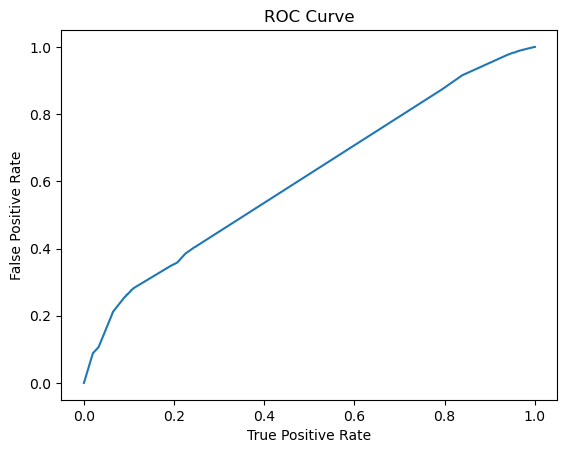

In [55]:


import matplotlib.pyplot as plt

plt.clf()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [56]:
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

Training set areaUnderROC: 0.6099487920624681


### Precision Recall Curve

Text(0.5, 0, 'Recall')

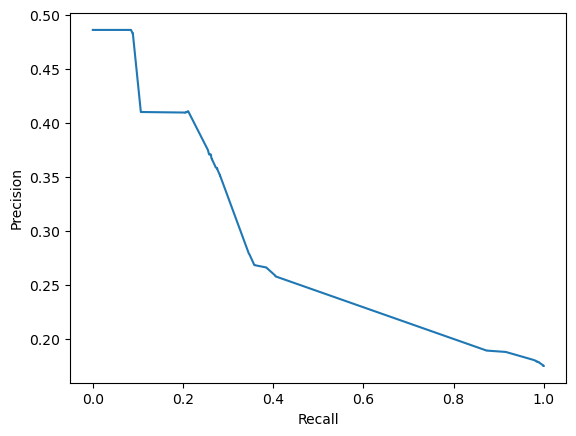

In [57]:
plt.clf()
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')


### Accuracy 

In [59]:
summary = model.evaluate(test)

In [60]:
summary.accuracy

0.8248124062031016

In [61]:
output = model.transform(test)

In [62]:
output

DataFrame[label: int, features: vector, rawPrediction: vector, probability: vector, prediction: double]

### Probability Output

In [63]:
output.show(10)

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|    0|(2236,[1001,1010,...|[2.42370198929074...|[0.91861693399722...|       0.0|
|    0|(2236,[1002,1010,...|[1.46842668165655...|[0.81281813160264...|       0.0|
|    0|(2236,[1002,1010,...|[1.46842668165655...|[0.81281813160264...|       0.0|
|    0|(2236,[1002,1010,...|[1.31819881636387...|[0.78888188041377...|       0.0|
|    0|(2236,[1002,1010,...|[1.40198120058633...|[0.80249808696130...|       0.0|
|    0|(2236,[1002,1010,...|[1.40198120058633...|[0.80249808696130...|       0.0|
|    0|(2236,[1002,1010,...|[1.40198120058633...|[0.80249808696130...|       0.0|
|    0|(2236,[1002,1010,...|[1.40198120058633...|[0.80249808696130...|       0.0|
|    0|(2236,[1002,1010,...|[1.40198120058633...|[0.80249808696130...|       0.0|
|    0|(2236,[10

In [64]:
output.select('label','prediction').show(10)

+-----+----------+
|label|prediction|
+-----+----------+
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
+-----+----------+
only showing top 10 rows



### ROC

In [65]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [66]:
evaluator = BinaryClassificationEvaluator()

In [67]:
print('Test Area Under ROC', evaluator.evaluate(output))

Test Area Under ROC 0.6048483450951326
